## importing required libs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data 
df = pd.read_csv('Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
## checking the shape of the dataset
df.shape


(1000, 40)

data has 1000 rows and 40 columns

In [4]:
# checking data type
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

Different columns contain different number of categories or numerics. Column _c39 is not containing any data

In [5]:
# checking null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

there is no missing values present in data set expect from _c39 which is containing only null values

In [6]:
df.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

There are values denoted as '?' which are might be NaN values. Hence, we need to get rid of those.

In [7]:
# before dropping these '?' values we are converting those into NaN values
df = df.replace('?',np.NaN)

In [8]:
df.isin(['?']).sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

now there is no values as '?'..

In [9]:
## checking null values once again
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

there are missing values in collision_type, property_damage, police_report_available, _c39 columns.

In [10]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [11]:
df['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [12]:
df['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [13]:
## We have repalce the collision type with the mode value
df['collision_type']=df['collision_type'].fillna(df['collision_type'].mode()[0])
## We have replace the property damage info as no for nan values                                                  
df['property_damage']=df['property_damage'].replace(np.nan,'NO')
## We also repalce NO with nan values where police report had ? in our dataset.                                                 
df['police_report_available']=df['police_report_available'].replace(np.nan,'NO')
# we repalced _c39 because it all contain null values
df=df.drop(['_c39'],axis=1)

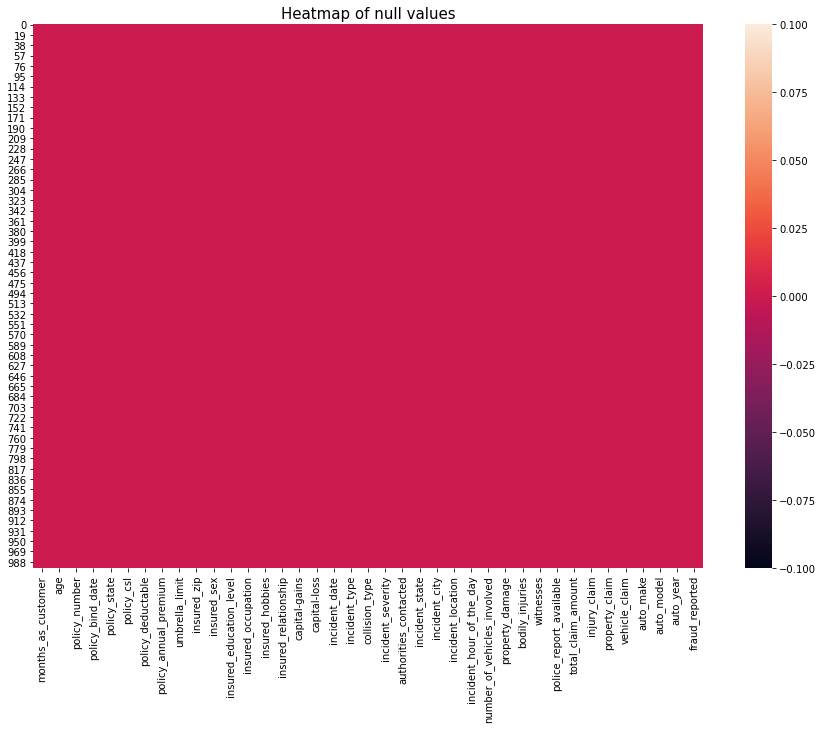

In [14]:
# ploting heatmap for null values check
plt.figure(figsize=(15,10))
plt.title('Heatmap of null values',fontsize=15)
sns.heatmap(df.isnull());

dataset has no null values.

In [15]:
## Checking unique values
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [16]:
## Creating a new feature for vehicle age
df['vechicle_age']=2021-df['auto_year']

In [17]:
## let's delete unnecassary columns
df=df.drop(['policy_number','insured_zip','incident_location','auto_year','policy_bind_date','policy_state','incident_date'],axis=1)

In [18]:
## Selecting object data type
do=df.select_dtypes(include='object')

In [19]:
for i in do:
    print('--------------',i,'---------------------------')
    print(do[i].value_counts())

-------------- policy_csl ---------------------------
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
-------------- insured_sex ---------------------------
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
-------------- insured_education_level ---------------------------
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
-------------- insured_occupation ---------------------------
machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
-------------- insured_hobbies ---------------------------
reading     

In [20]:
# stats summary
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,vechicle_age
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,15.897000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,6.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,11.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,16.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,21.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,26.000000


1. There is no missing value present in numerical data.

2. Minimum age is 19 and maximum age is 64.

3. Policy number is the unique id that we will drop as it is not required.

4. policy_deductable is a discrete data.

5. Minimum annual premium is 433.33 and maximum annual premium is 2047.59

6. Minimum Umbrella limit is showing negative numbers, we need to analyze that once again.

7. number_of_vehicles_involved, bodily_injuries, witnesses features are containing discrete data.



## Data Visulization

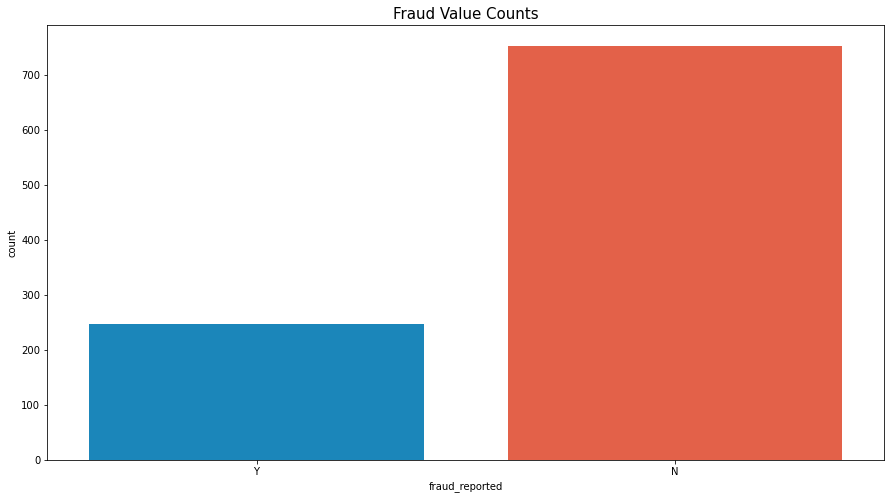

In [21]:
plt.figure(figsize=(15,8))
plt.title('Fraud Value Counts',fontsize=15)
plt.style.use('fivethirtyeight')
sns.countplot(df['fraud_reported'], data=df);


32 % insurance claims reported as Yes in our dataset and 68 % as No

In [22]:
def value_count(df,col):
    plt.figure(figsize=(15,8))
    plt.title(col+' no of counts',fontsize=15)
    plt.style.use('fivethirtyeight')
    sns.countplot(df[col], data=df)

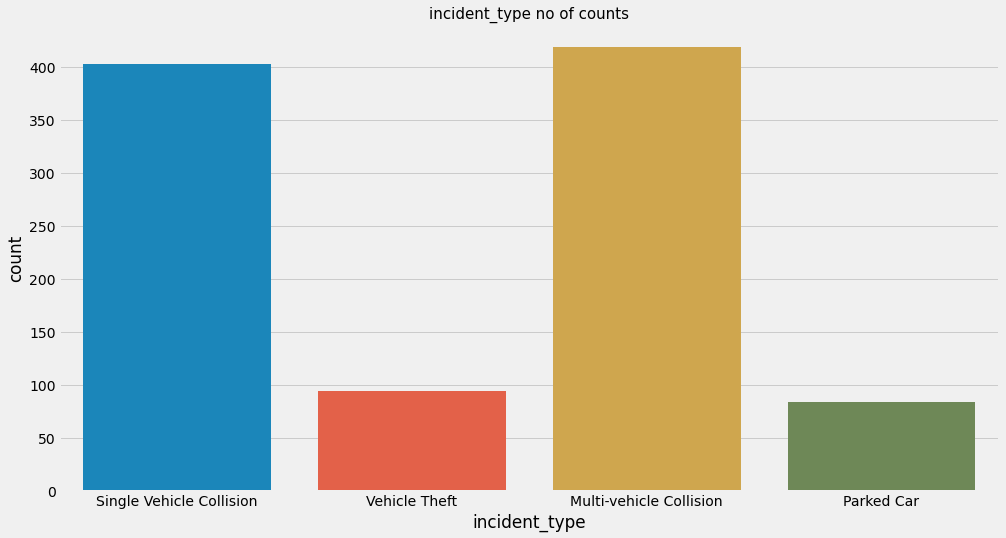

In [23]:
value_count(df,'incident_type')

In accident type, Multi vehicle collision is major issue.

Majority of insurance claimed for accidental vehicle. fer for theft vehicle.

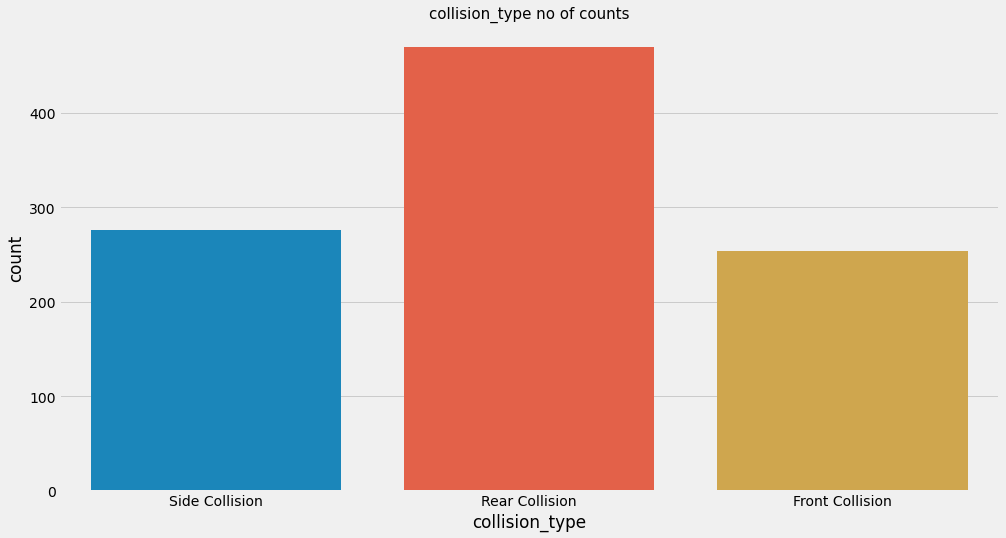

In [24]:
value_count(df,'collision_type')

most of vehcile the type of collision is rear collision

side collision and front collision are apporimatly same 

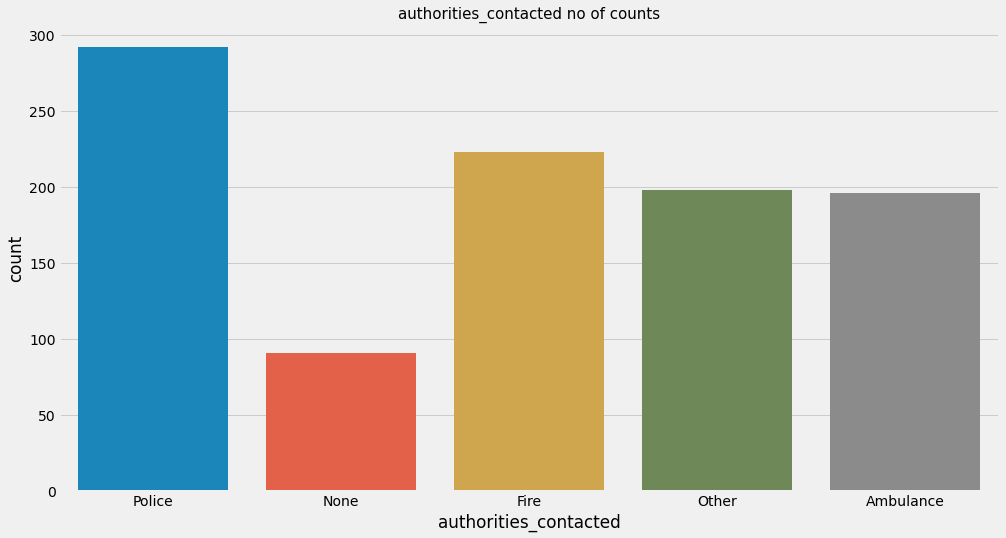

In [25]:
value_count(df,'authorities_contacted')

most of cases, vehicle owner called to police first.


Fire after the collision may be a 2nd prime reason.

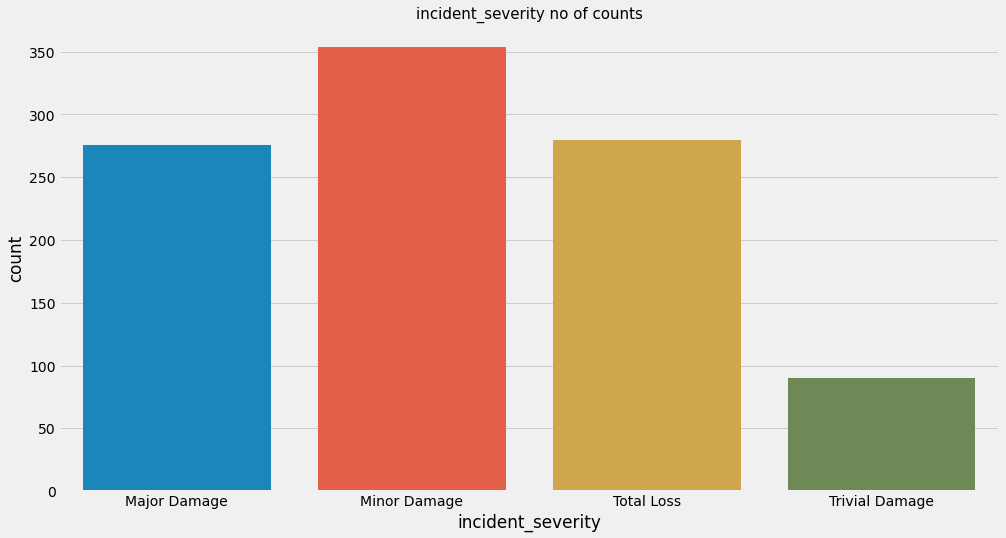

In [26]:
value_count(df,'incident_severity')

In most of insurance claim, the damage to vehicle is minor in nature.

 Major damage vehicles are 280 in our dataset.

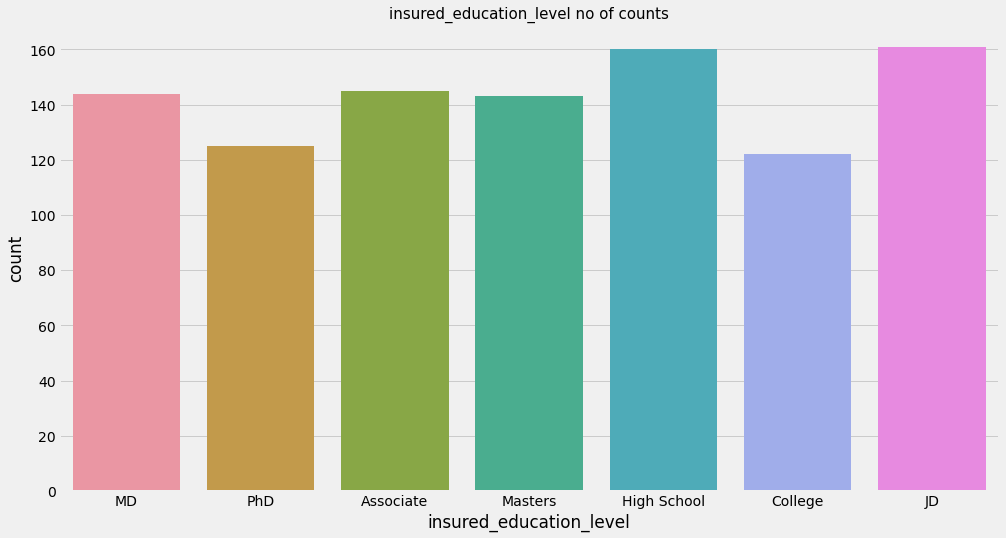

In [27]:
# Breakdown of Average Vehicle claim by insured's education level, grouped by fraud reported
value_count(df,'insured_education_level')

Highscool passout and doctor of law are the major persons who claimed for Insurance

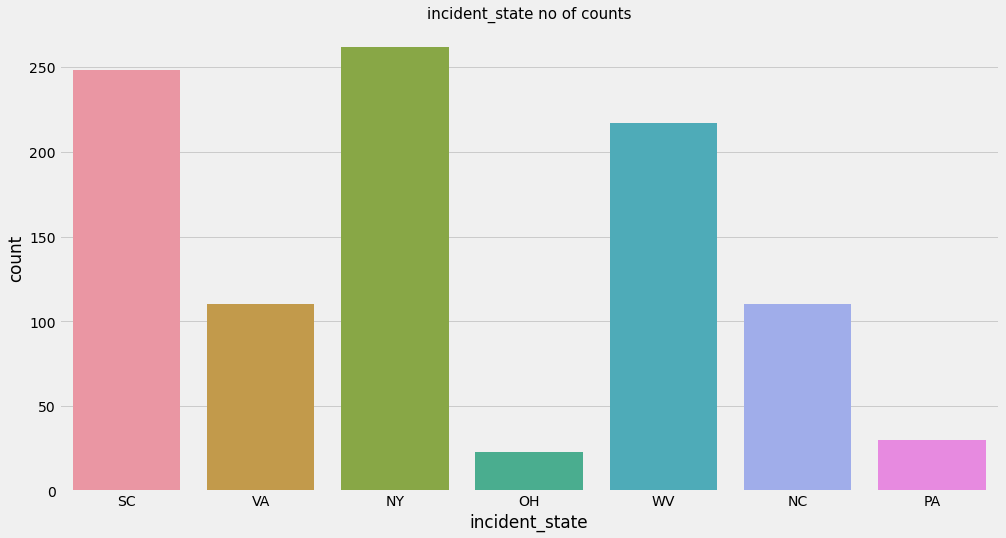

In [28]:
value_count(df,'incident_state')

Majority of accident spotted in NY followed by SC in USA.

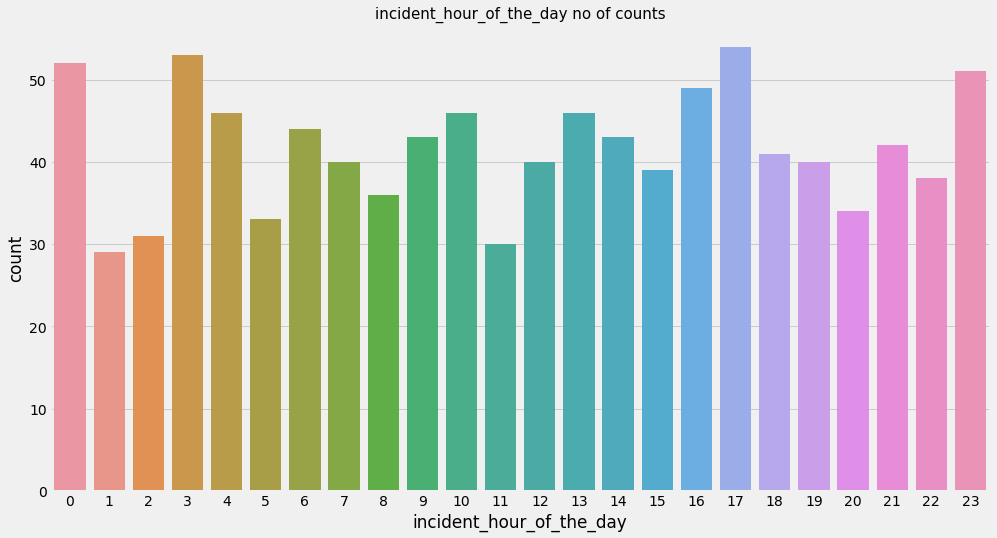

In [29]:
value_count(df,'incident_hour_of_the_day')

midnight and in afternoon 12pm-5pm the chances of accidents are high.

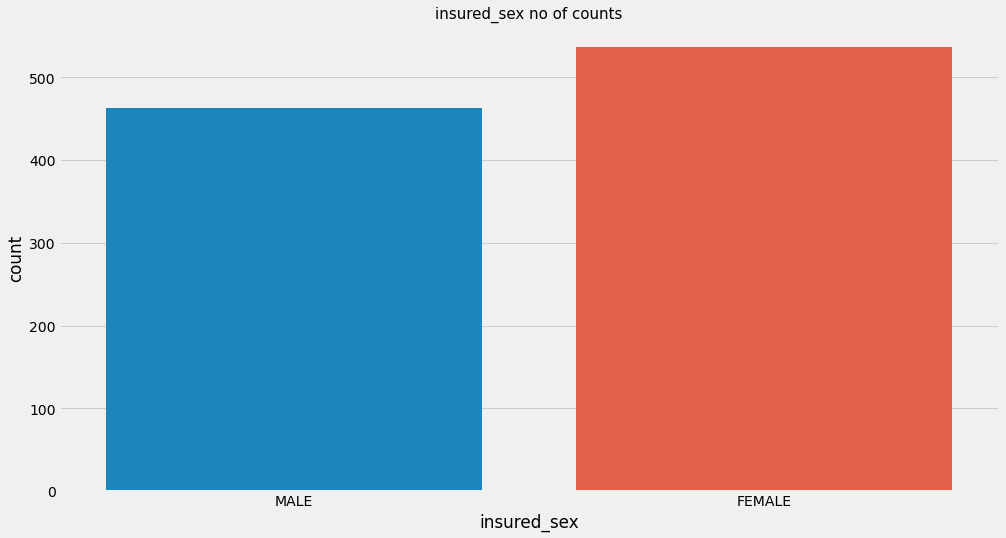

In [30]:
value_count(df,'insured_sex')

Females claims more than men for vehicle insurance.

## Visualization with target col

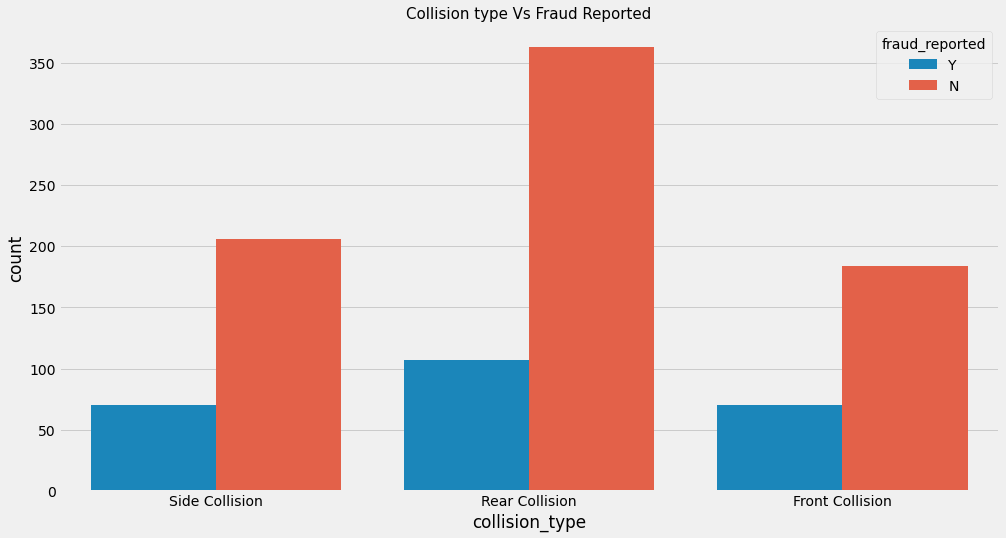

In [31]:
plt.figure(figsize=(15,8))
plt.title('Collision type Vs Fraud Reported',fontsize=15)
plt.style.use('fivethirtyeight')
sns.countplot(df['collision_type'],hue='fraud_reported',data=df);

rear collision most genuine appicant claime for insurance cover. There is lease froud reported in case of Rear collision

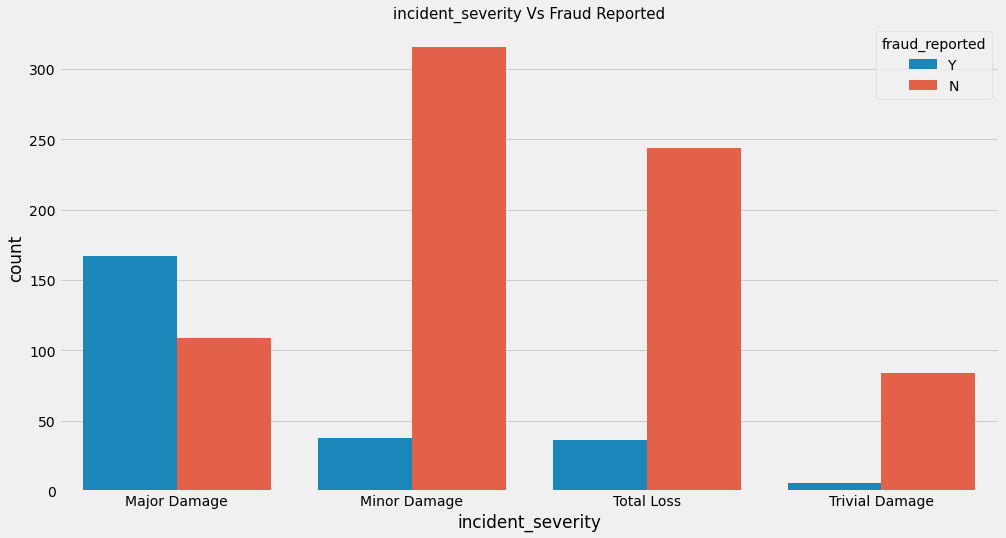

In [32]:
plt.figure(figsize=(15,8))
plt.title('incident_severity Vs Fraud Reported',fontsize=15)
plt.style.use('fivethirtyeight')
sns.countplot(df['incident_severity'],hue='fraud_reported',data=df);

1-In mAjor damage case most of Fraud insurance claims reported.

2-In minor case we could see very least cases reported to froud as compared to number of cases reported of minor damage.

3- In trivial damage, lowest fraud reported.

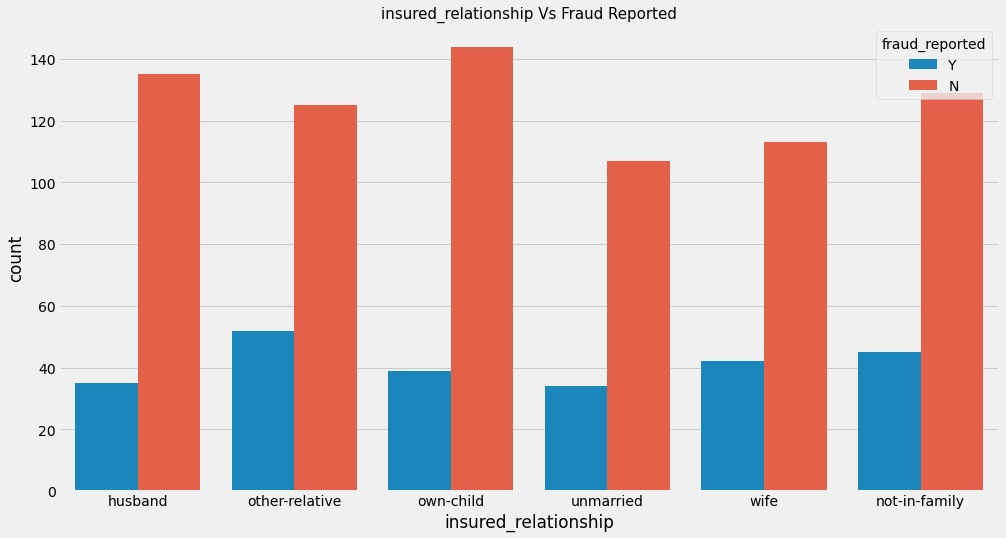

In [33]:
plt.figure(figsize=(15,8))
plt.title('insured_relationship Vs Fraud Reported',fontsize=15)
sns.countplot(df['insured_relationship'],hue='fraud_reported',data=df);

Fraud reports are more in counts in case of other relatives of insured relationship.

## Data Distribution Plot

In [34]:
df_n=df.select_dtypes(exclude='object')

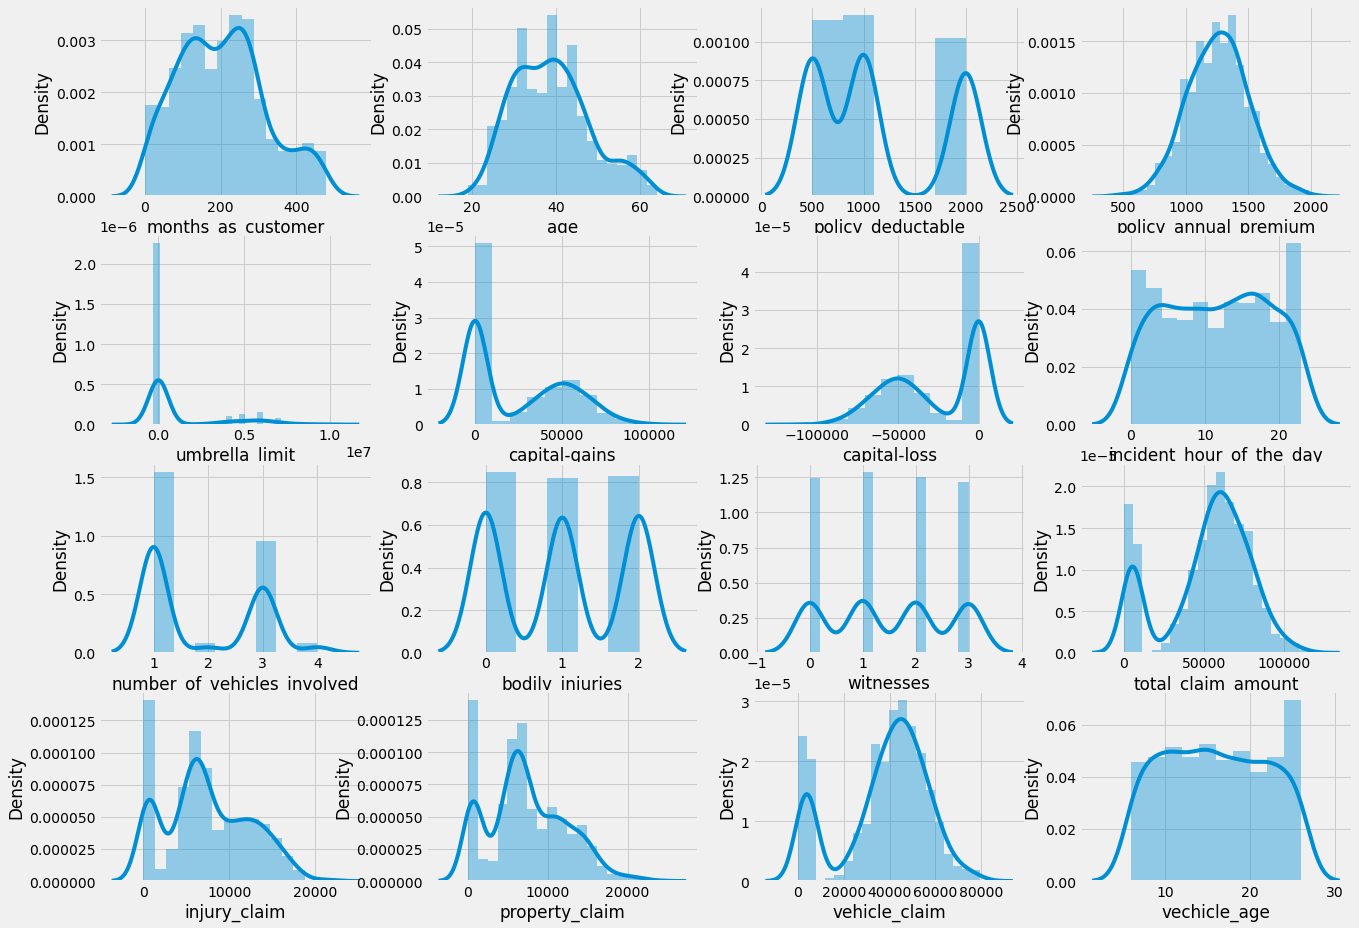

In [35]:
plt.figure(figsize=(20,15))
plot=1
for i in df_n:
    if plot<=16:
        plt.subplot(4,4,plot)
        sns.distplot(df[i])
        plot=plot+1

## Outliers boxplot

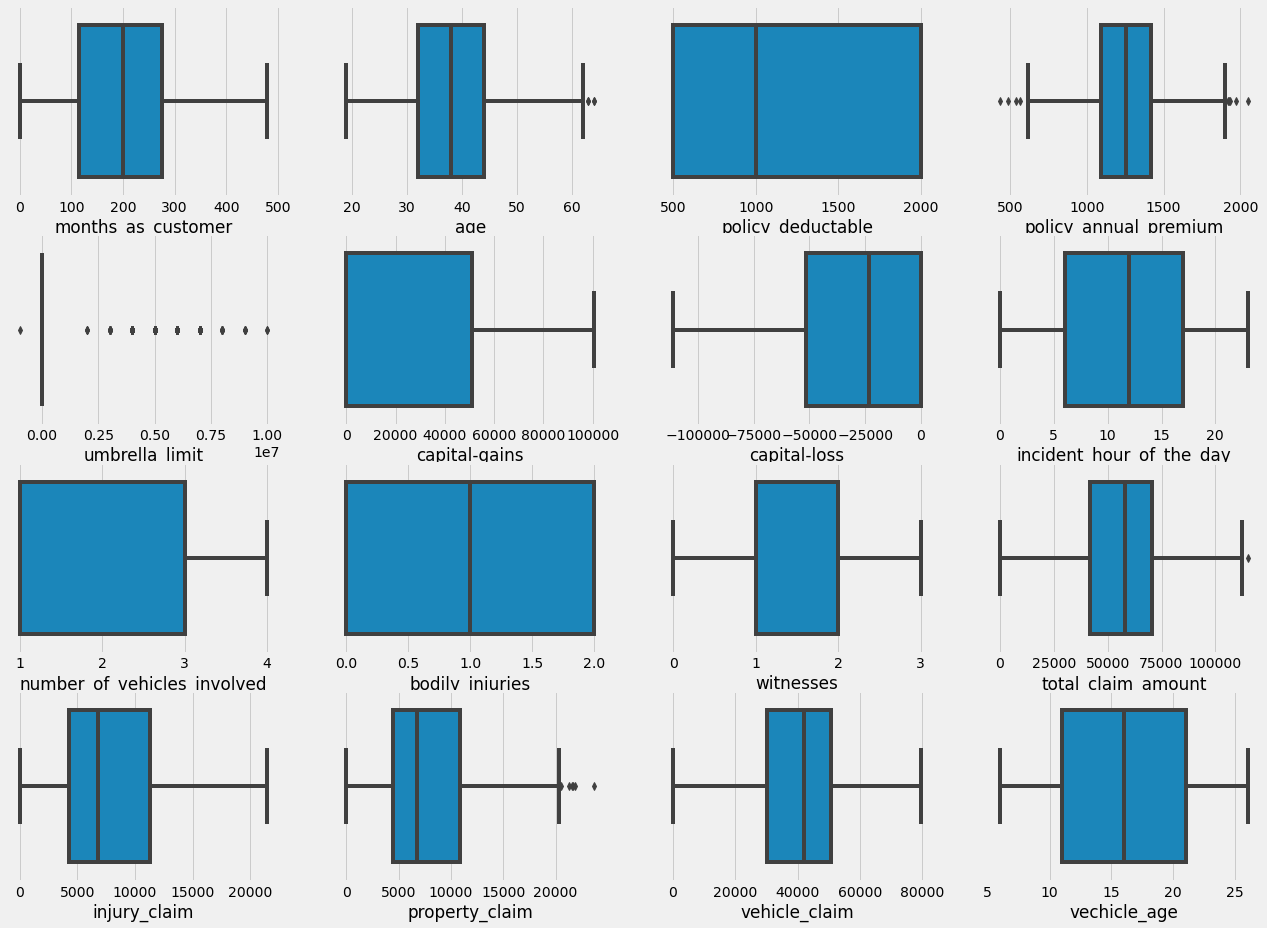

In [36]:
plt.figure(figsize=(20,15))
plot=1
for i in df_n:
    if plot<=16:
        plt.subplot(4,4,plot)
        sns.boxplot(df[i])
        plot=plot+1

We have no very far outliers which can impact on our prediction. So we will use it as it is

## Skewness

In [37]:
## time to check skewness
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
vechicle_age                   0.048289
dtype: float64

Our skewness in alomost okk

## Label Encoder

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in do:
    df[i]=le.fit_transform(df[i])

In [39]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vechicle_age
0,328,48,1,1000,1406.91,0,1,4,2,17,...,2,1,71610,6510,13020,52080,10,1,1,17
1,228,42,1,2000,1197.22,5000000,1,4,6,15,...,0,0,5070,780,780,3510,8,12,1,14
2,134,29,0,2000,1413.14,5000000,0,6,11,2,...,3,0,34650,7700,3850,23100,4,30,0,14
3,256,41,1,2000,1415.74,6000000,0,6,1,2,...,2,0,63400,6340,6340,50720,3,34,1,7
4,228,44,2,1000,1583.91,6000000,1,0,11,2,...,1,0,6500,1300,650,4550,0,31,0,12


## Correlation


In [40]:
df.corr()['fraud_reported']

months_as_customer             0.020544
age                            0.012143
policy_csl                    -0.037190
policy_deductable              0.014817
policy_annual_premium         -0.014480
umbrella_limit                 0.058622
insured_sex                    0.030873
insured_education_level        0.008808
insured_occupation             0.001564
insured_hobbies               -0.046838
insured_relationship           0.021043
capital-gains                 -0.019173
capital-loss                  -0.014863
incident_type                 -0.050376
collision_type                -0.017315
incident_severity             -0.405988
authorities_contacted         -0.045802
incident_state                -0.051407
incident_city                 -0.040403
incident_hour_of_the_day       0.004316
number_of_vehicles_involved    0.051839
property_damage                0.017202
bodily_injuries                0.033877
witnesses                      0.049497
police_report_available       -0.027768


<AxesSubplot:title={'center':'Correlation with fraud_reported'}>

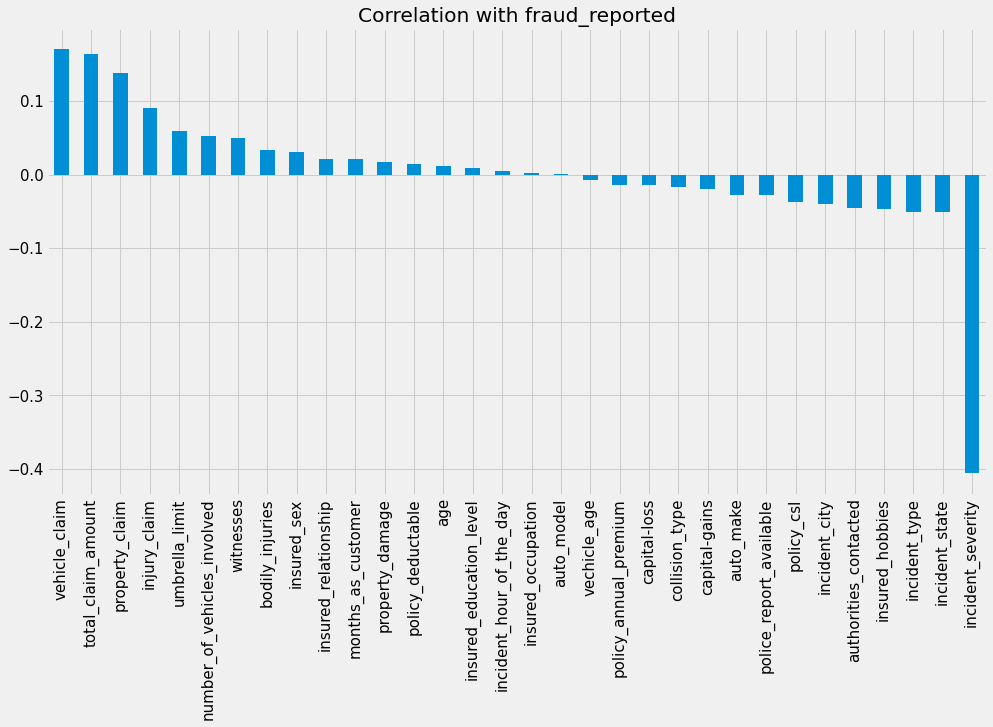

In [41]:
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot.bar(figsize=(15,8),grid=True,title='Correlation with fraud_reported',fontsize=15)


1- Incident Severity is highly negatively correlated with our target Attribute.

2- Neither there is a very strong nor very weak correlation exist with target attribute.

3-Auto model, insured occupation has approx zero correlation with our target attribute

## Correlation Heatmapplot

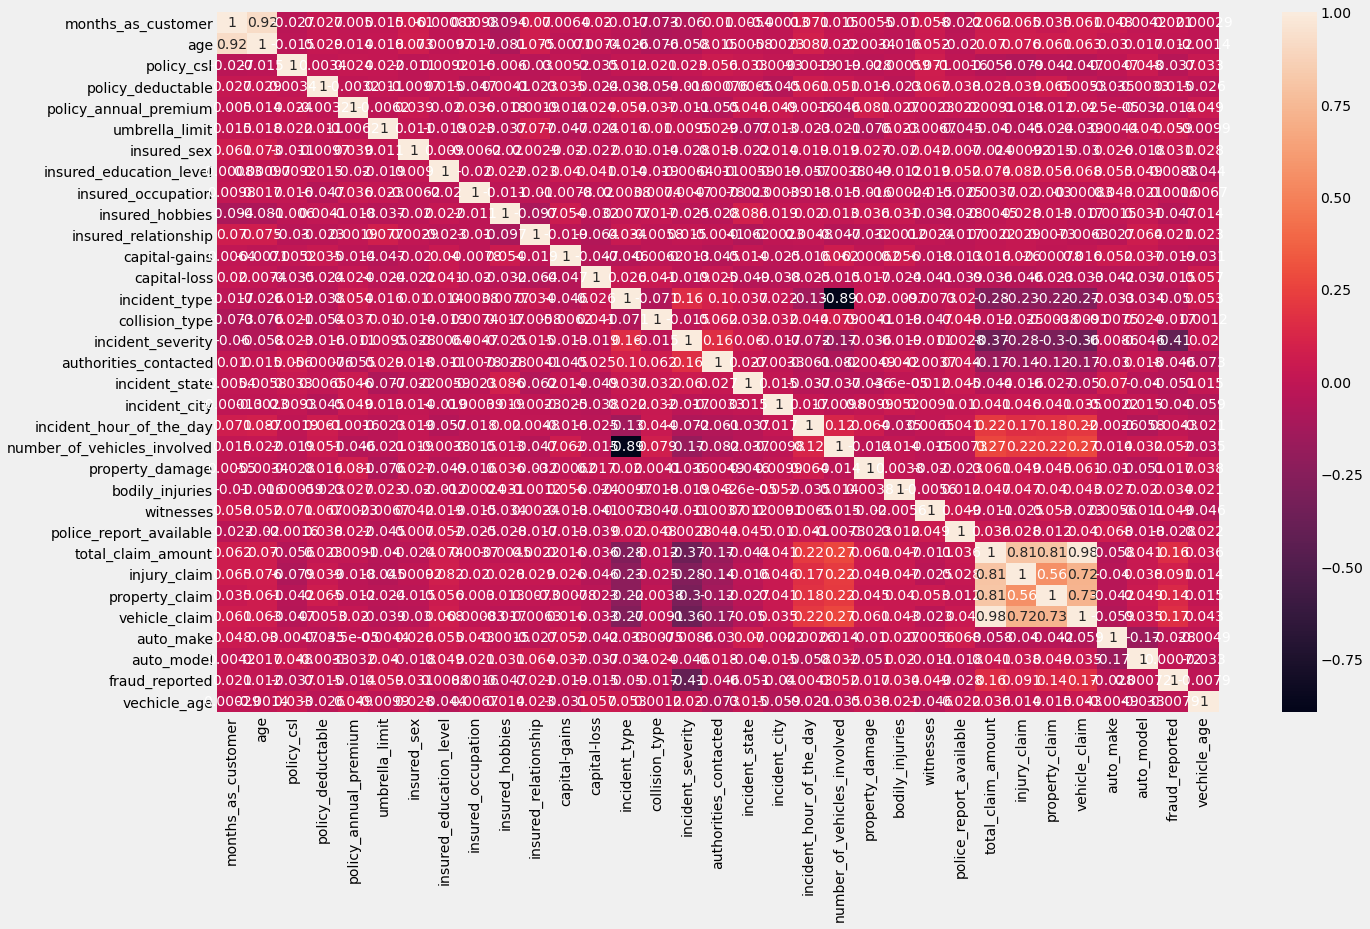

In [43]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True);

## Split the data in X and Y

In [44]:
x=df.drop(['fraud_reported'],axis=1)
y=df[['fraud_reported']]

## Standardization:

In [47]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,vechicle_age
0,1.078140,0.990836,0.060937,-0.222383,0.616705,-0.479476,1.076953,0.530931,-1.158316,1.281737,...,0.009759,0.461838,1.478078,0.714257,-0.189283,1.165505,0.749653,0.856466,-1.645743,0.183440
1,0.208995,0.334073,0.060937,1.412784,-0.242521,1.697980,1.076953,0.530931,-0.162558,0.929078,...,-1.210174,-1.338700,-0.676554,-1.807312,-1.363822,-1.372696,-1.823346,0.360539,-0.657470,-0.315491
2,-0.608002,-1.088913,-1.182668,1.412784,0.642233,1.697980,-0.928546,1.557877,1.082141,-1.363201,...,1.229693,1.362107,-0.676554,-0.686362,0.054644,-0.736072,-0.785565,-0.631315,0.959702,-0.315491
3,0.452355,0.224613,0.060937,1.412784,0.652886,2.133471,-0.928546,1.557877,-1.407256,-1.363201,...,0.009759,0.461838,-0.676554,0.403135,-0.224130,-0.219722,0.677607,-0.879279,1.319074,-1.479664
4,0.208995,0.552994,1.304542,-0.222383,1.341980,2.133471,1.076953,-1.522961,1.082141,-1.363201,...,-1.210174,-0.438431,-0.676554,-1.753121,-1.257232,-1.399654,-1.768252,-1.623169,1.049545,-0.648112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,1.304542,-0.222383,0.222884,-0.479476,-0.928546,1.044404,-1.158316,0.576420,...,-1.210174,-0.438431,-0.676554,1.305049,2.051155,0.273817,1.224309,-0.135388,-1.196528,-0.149180
996,0.704407,0.224613,-1.182668,-0.222383,0.739141,-0.479476,-0.928546,1.557877,0.584261,1.281737,...,1.229693,1.362107,-0.676554,2.111466,2.182342,2.214794,1.821868,1.600357,0.780016,-1.645974
997,-0.642767,-0.541611,0.060937,-1.039966,0.520739,0.826998,-0.928546,1.044404,-1.407256,-1.186872,...,1.229693,1.362107,1.478078,0.558507,0.013648,0.020826,0.771902,1.104430,-0.028570,1.513924
998,2.208028,2.523284,1.304542,1.412784,0.411866,1.697980,1.076953,-1.522961,-0.411497,-1.715859,...,-1.210174,-0.438431,1.478078,-0.219110,-0.453708,-0.451976,-0.073580,-1.375206,-1.286371,1.181303


## Feature Importance

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)

ExtraTreesClassifier()

In [49]:
print(extra.feature_importances_)

[0.02878303 0.02922633 0.02433852 0.02444124 0.02984752 0.02201023
 0.0170317  0.02841715 0.03318282 0.04322184 0.02709182 0.02453524
 0.02606648 0.0174193  0.02254352 0.16719654 0.02636658 0.02867343
 0.02866784 0.02797986 0.01784425 0.01756228 0.02527828 0.02780128
 0.01825814 0.03321093 0.02851732 0.03228313 0.0335246  0.03104119
 0.02739661 0.03024102]


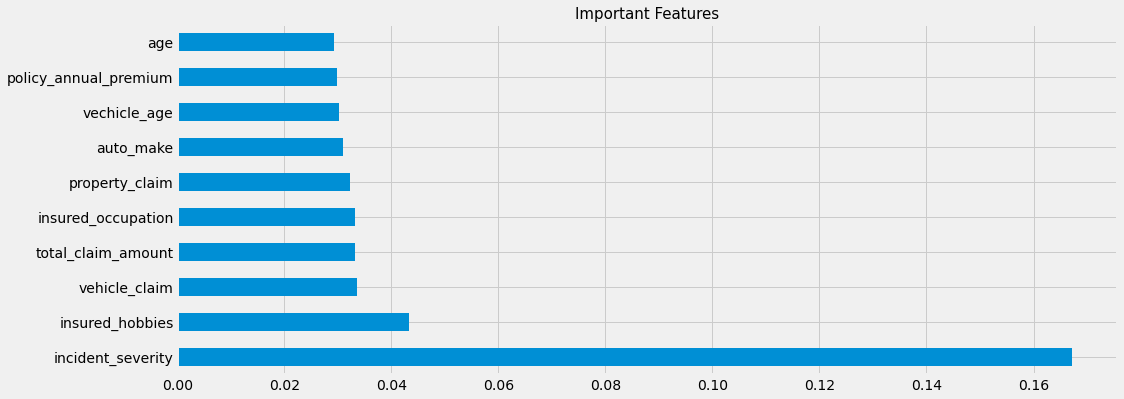

In [50]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show();

 incident severity is most important feature in our dataset to predict the claim.

## Time to create models

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc,plot_roc_curve
from imblearn.combine import SMOTEENN

In [71]:
#over sampling of our Data
sm=SMOTEENN()
x_resample,y_resample=sm.fit_resample(x,y)
x_resample

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,vechicle_age
0,0.208995,0.552994,1.304542,-0.222383,1.341980,2.133471,1.076953,-1.522961,1.082141,-1.363201,...,-1.210174,-0.438431,-0.676554,-1.753121,-1.257232,-1.399654,-1.768252,-1.623169,1.049545,-0.648112
1,-0.382024,-0.213229,1.304542,-1.039966,0.482754,-0.479476,-0.928546,0.530931,-1.158316,1.634395,...,0.009759,-1.338700,-0.676554,0.764280,-0.164686,1.215274,0.800509,-1.623169,1.229231,-1.645974
2,2.225411,2.523284,0.060937,-0.222383,-0.280465,1.262489,1.076953,0.017458,0.086382,-1.186872,...,0.009759,-1.338700,-0.676554,-0.212289,-1.523707,-0.447829,0.211426,1.104430,-0.028570,-0.980733
3,0.461047,0.443534,-1.182668,1.412784,0.269187,-0.479476,1.076953,-0.496015,0.584261,-0.128897,...,0.009759,1.362107,1.478078,-1.657624,-1.187539,-1.364401,-1.661772,1.352393,-0.926999,0.017130
4,-0.103898,-0.432150,-1.182668,-0.222383,-0.043091,-0.479476,-0.928546,1.044404,-0.909377,0.400091,...,-1.210174,-1.338700,-0.676554,0.903356,1.616596,0.054005,0.831234,0.360539,-1.106685,0.848682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,1.278556,1.250352,-0.495666,0.680930,-0.302826,1.938558,-0.030942,-0.158517,0.420637,-0.397673,...,-0.536248,-0.129896,-0.676554,0.435351,0.870844,0.888012,0.156674,-0.298371,1.200969,-0.682989
827,0.450418,0.275277,-0.952426,1.412784,0.231095,-0.479476,-0.928546,1.557877,1.128230,-0.350972,...,1.116763,0.545176,1.278622,1.049439,-0.024462,1.498988,1.090422,1.283531,-0.785614,-1.325709
828,0.249258,0.441498,0.037802,-1.039966,0.902486,2.972049,1.076953,-1.019040,-0.190343,-0.151858,...,-1.187480,-0.438431,-0.676554,0.663773,-0.086534,1.373397,0.599417,1.591131,0.764974,-1.319541
829,-0.554885,-0.700029,-1.182668,-0.786067,-0.987519,-0.479476,-0.928546,-0.017642,0.806944,-0.767401,...,-1.210174,-0.097315,-0.676554,0.647651,-0.969261,1.248237,0.836984,-0.152338,-0.260722,-1.055117


In [72]:
y_resample

,fraud_reported
0,0
1,0
2,0
3,0
4,0
...,...
826,1
827,1
828,1
829,1


In [79]:
def max_accuracy_score(clf,x,y):
    max_accuracy=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=.20,random_state=i,stratify=y_resample) 
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy*100)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean()*100)
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std()*100)
    print('\n')
    print('F1 score',f1_score(y_test,pred)*100)
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred)*100)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    return final_r

## LogisticRegression

max accuracy score corresponding to 93 is 92.81437125748504


cross validation score 77.39999999999999


Standard Deviation 2.8705400188814676


F1 score 95.20295202952029


Training accuracy 90.96385542168674


Test Accuracy 92.21556886227546


Confusion Matrix [[ 25  10]
 [  3 129]]


Classification Report               precision    recall  f1-score   support

           0       0.89      0.71      0.79        35
           1       0.93      0.98      0.95       132

    accuracy                           0.92       167
   macro avg       0.91      0.85      0.87       167
weighted avg       0.92      0.92      0.92       167



Roc_auc Score 84.57792207792208





93

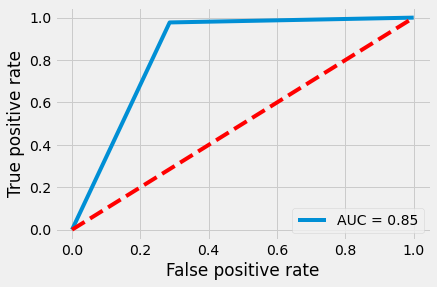

In [80]:
lr=LogisticRegression()
max_accuracy_score(lr,x,y)

## Decision Tree


max accuracy score corresponding to 44 is 96.40718562874252


cross validation score 76.8


Standard Deviation 2.345207879911717


F1 score 96.6542750929368


Training accuracy 100.0


Test Accuracy 94.61077844311377


Confusion Matrix [[ 28   7]
 [  2 130]]


Classification Report               precision    recall  f1-score   support

           0       0.93      0.80      0.86        35
           1       0.95      0.98      0.97       132

    accuracy                           0.95       167
   macro avg       0.94      0.89      0.91       167
weighted avg       0.95      0.95      0.94       167



Roc_auc Score 89.24242424242425





44

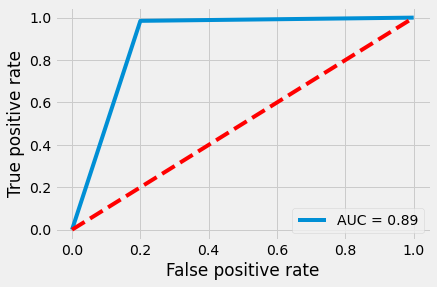

In [81]:
dt=DecisionTreeClassifier()
max_accuracy_score(dt,x,y)

## KNN

max accuracy score corresponding to 62 is 91.01796407185628


cross validation score 71.69999999999999


Standard Deviation 2.5416530054277646


F1 score 93.61702127659575


Training accuracy 90.21084337349397


Test Accuracy 89.22155688622755


Confusion Matrix [[ 17  18]
 [  0 132]]


Classification Report               precision    recall  f1-score   support

           0       1.00      0.49      0.65        35
           1       0.88      1.00      0.94       132

    accuracy                           0.89       167
   macro avg       0.94      0.74      0.80       167
weighted avg       0.91      0.89      0.88       167



Roc_auc Score 74.28571428571429





62

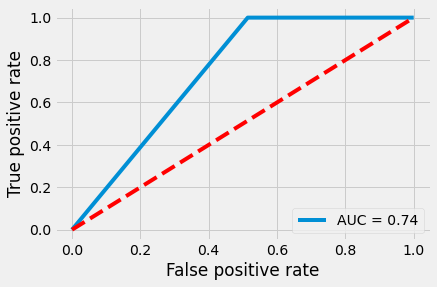

In [82]:
knn=KNeighborsClassifier()
max_accuracy_score(knn,x,y)

## Naive Bayes

max accuracy score corresponding to 97 is 93.41317365269461


cross validation score 72.09999999999998


Standard Deviation 4.8


F1 score 92.53731343283583


Training accuracy 87.19879518072288


Test Accuracy 88.02395209580838


Confusion Matrix [[ 23  12]
 [  8 124]]


Classification Report               precision    recall  f1-score   support

           0       0.74      0.66      0.70        35
           1       0.91      0.94      0.93       132

    accuracy                           0.88       167
   macro avg       0.83      0.80      0.81       167
weighted avg       0.88      0.88      0.88       167



Roc_auc Score 79.82683982683983





97

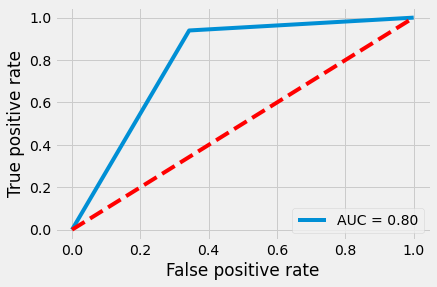

In [83]:
gnb=GaussianNB()
max_accuracy_score(gnb,x,y)

## Random Forest

max accuracy score corresponding to 97 is 98.20359281437125


cross validation score 77.2


Standard Deviation 2.731300056749535


F1 score 96.6789667896679


Training accuracy 100.0


Test Accuracy 94.61077844311377


Confusion Matrix [[ 27   8]
 [  1 131]]


Classification Report               precision    recall  f1-score   support

           0       0.96      0.77      0.86        35
           1       0.94      0.99      0.97       132

    accuracy                           0.95       167
   macro avg       0.95      0.88      0.91       167
weighted avg       0.95      0.95      0.94       167



Roc_auc Score 88.1926406926407





97

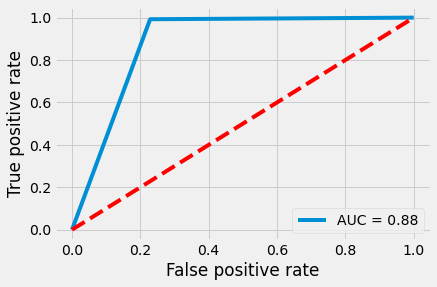

In [84]:
rf=RandomForestClassifier()
max_accuracy_score(rf,x,y)

## Ada Boost

max accuracy score corresponding to 76 is 97.60479041916167


cross validation score 79.7


Standard Deviation 3.4146742157927736


F1 score 98.09885931558935


Training accuracy 98.19277108433735


Test Accuracy 97.0059880239521


Confusion Matrix [[ 33   2]
 [  3 129]]


Classification Report               precision    recall  f1-score   support

           0       0.92      0.94      0.93        35
           1       0.98      0.98      0.98       132

    accuracy                           0.97       167
   macro avg       0.95      0.96      0.96       167
weighted avg       0.97      0.97      0.97       167



Roc_auc Score 96.00649350649351





76

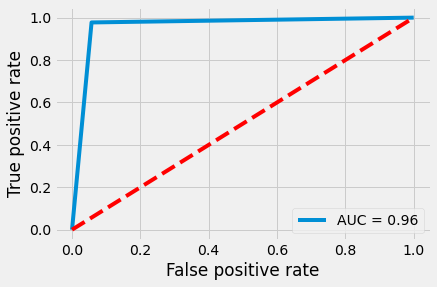

In [85]:
Adb=AdaBoostClassifier()
max_accuracy_score(Adb,x,y)

## Gardient Boost


max accuracy score corresponding to 97 is 99.40119760479041


cross validation score 81.30000000000001


Standard Deviation 3.215587038162703


F1 score 98.86792452830187


Training accuracy 100.0


Test Accuracy 98.20359281437125


Confusion Matrix [[ 33   2]
 [  1 131]]


Classification Report               precision    recall  f1-score   support

           0       0.97      0.94      0.96        35
           1       0.98      0.99      0.99       132

    accuracy                           0.98       167
   macro avg       0.98      0.97      0.97       167
weighted avg       0.98      0.98      0.98       167



Roc_auc Score 96.76406926406926





97

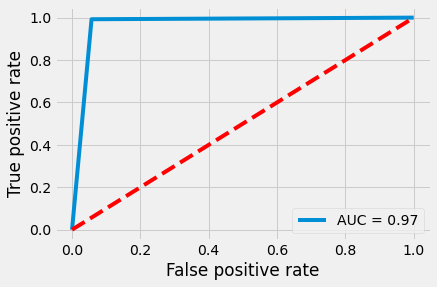

In [86]:
gb=GradientBoostingClassifier()
max_accuracy_score(gb,x,y)

## Let's check ROC_AUC curve for fitted models:

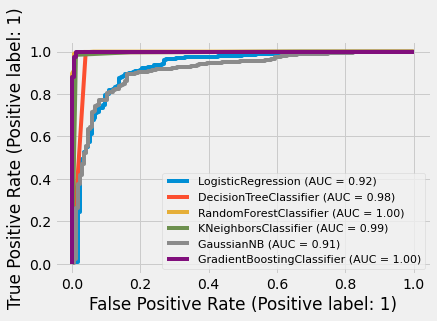

In [89]:
disp = plot_roc_curve(lr,x_resample,y_resample)
plot_roc_curve(dt,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(rf,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(knn,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(gnb,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(gb,x_resample,y_resample,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

The AUC curve of Gradient Boosting Classifier and Random Forest Classifier has covered 100% area under the curve.

the accuracy score of Gradient Boosting Classifier and the difference of Accuracy Score and CV of Gradient Boosting Classifier is least, it's the best Model. Let's do Hyperparameter Tuning of Gradient Boosting Classifier.

In [97]:
X_resampled, y_resampled = sm.fit_resample(x,y)
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,random_state=78,test_size=.20,stratify=y_resampled)

grid_param={
    "n_estimators":[12,13,15,17],
    "max_depth":range(4,12,2),
    "learning_rate":np.arange(0.1,1,0.1),
    "min_samples_split":range(4,8,2),
    "max_features":['auto', 'sqrt','log2']}

grid = GridSearchCV(gb,param_grid = grid_param)
grid.fit(x_train,y_train)
grid.best_params_

{'learning_rate': 0.5,
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 17}

In [98]:
gbdt_clf = GradientBoostingClassifier(max_depth=6,min_samples_split=4,learning_rate=0.5,max_features ='auto',n_estimators=17)
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")
      
#####################TestScore##########################   
      
pred=gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n=======================Test Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n")      
      


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    134.0  549.0       1.0      683.0         683.0
________________________________________________________________
 Confusion Matrix:
[[134   0]
 [  0 549]]


=======================Test Result===========================
Accuracy score:96.49%
_______________________________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.965517    0.964789  0.964912    0.965153      0.964929
recall      0.848485    0.992754  0.964912    0.920619      0.964912
f1-score    0.903226    0.978571  0.964912  

After tuning with best parameters of Gradient Boosting Classifier,we have got best accuracy of 96.49%.

In [100]:
Report = classification_report(y_test,pred)
print(Report)


              precision    recall  f1-score   support

           0       0.97      0.85      0.90        33
           1       0.96      0.99      0.98       138

    accuracy                           0.96       171
   macro avg       0.97      0.92      0.94       171
weighted avg       0.96      0.96      0.96       171



Classification report is showing the Precision for not fraud is 97% and for fraud its 96%, recall is showing 85% for not fraud and 99% for fraud ,f1-score for not fraud is 90 and for fraud is 98.

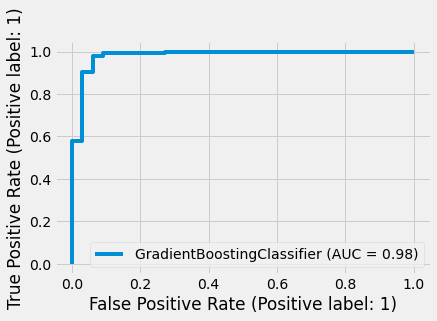

In [101]:
disp = plot_roc_curve(gbdt_clf,x_test,y_test)

The AUC curve of Gradient Boosting Classifier is coving 98% area under the curve.

## Saving The Model

In [105]:
import joblib

joblib.dump(gbdt_clf,'gbdt_insur_file.obj')


['gbdt_insur_file.obj']

## Loading The Model and Testing

In [106]:
gbdt_from_joblib=joblib.load('gbdt_insur_file.obj')
gbdt_from_joblib.predict(x_test)


array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## ;) Mission Complete 